# Decision tree

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

dsc_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

In [3]:
dsc_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [4]:
export_graphviz(
    dsc_clf,
    out_file="tree.dot",
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

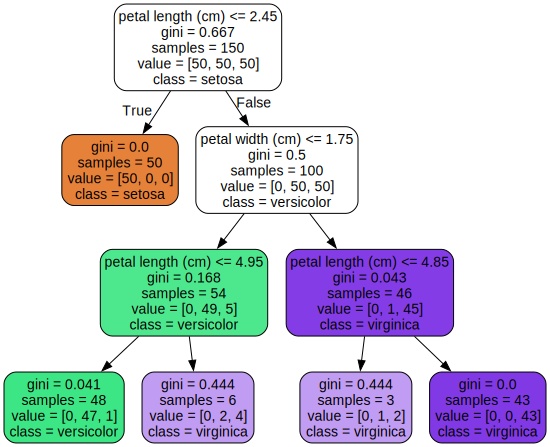

In [6]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        dsc_clf,
        out_file="tree.dot",
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
from graphviz import Source

Source.from_file("tree.dot")


In [7]:
# Source.from_file("tree.dot")

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


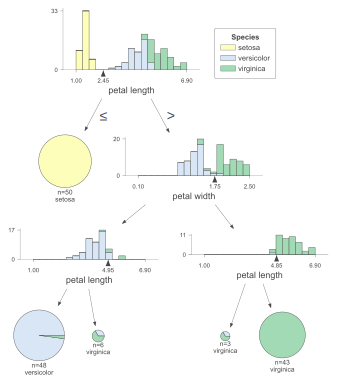

In [8]:
# # Visualize the tree
import dtreeviz
viz = dtreeviz.model(
    model=dsc_clf,
    X_train=X_iris,
    y_train=y_iris,
    target_name="Species",
    feature_names=["petal length", "petal width"],  # Custom names (shorter)
    class_names=iris.target_names,
)

viz.view()

In [9]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [11]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)



0.898

In [12]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

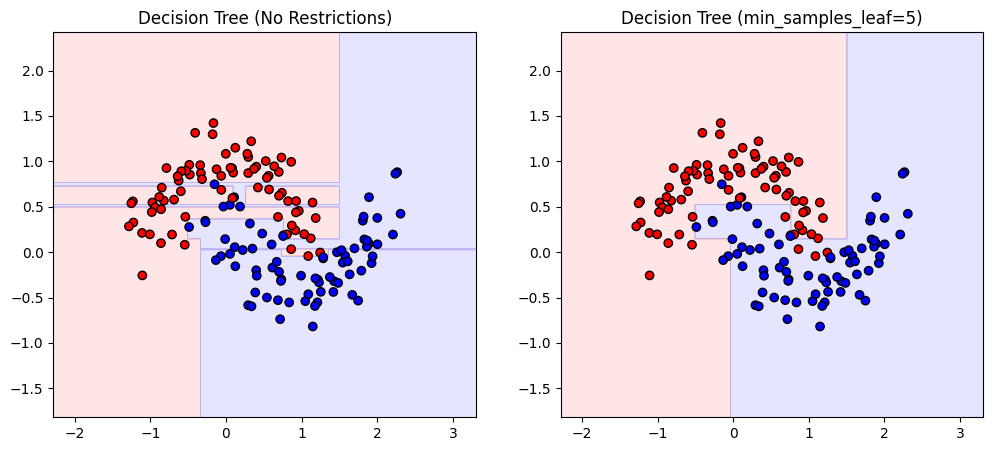

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, ax, title):
    # Create a mesh grid
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                         np.arange(x2_min, x2_max, 0.01))

    # Predict over the grid
    y_pred = clf.predict(np.c_[x1.ravel(), x2.ravel()])
    y_pred = y_pred.reshape(x1.shape)

    # Plot the decision boundary
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
    ax.set_title(title)

# Plot decision boundaries for both classifiers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(tree_clf1, X_moons, y_moons, axes[0], "Decision Tree (No Restrictions)")
plot_decision_boundary(tree_clf2, X_moons, y_moons, axes[1], "Decision Tree (min_samples_leaf=5)")
plt.show()

In [14]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [16]:
from graphviz import Source
from sklearn.tree import export_graphviz

# Export the decision tree to a .dot file
export_graphviz(
    tree_reg,
    out_file="tree_reg.dot",
    feature_names=["Feature"],
    rounded=True,
    filled=True
)
Source.from_file("tree_reg.dot").view()
# Visualize the .dot file

'tree_reg.dot.pdf'

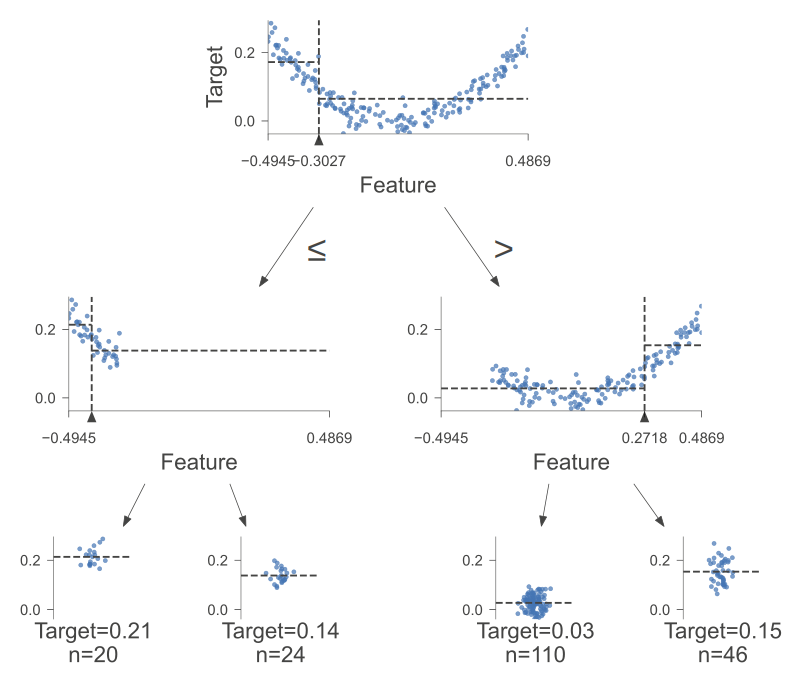

In [19]:
# Visualize the decision tree using dtreeviz
viz = dtreeviz.model(
    model=tree_reg,
    X_train=X_quad,
    y_train=y_quad,
    target_name="Target",
    feature_names=["Feature"]
)

viz.view(scale=2.5)

In [20]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)